LY Jean-Baptiste - RICHAUME Anthéa

# Projet : Couverture de Graphe : Vertex Cover

In [1]:
import networkx as nwx
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import algorithmes
from algorithmes import graphes as gr
from algorithmes import methodesApprochees as ma
from algorithmes import separationEvaluation as se
%reload_ext autoreload
%autoreload 2
from IPython.display import Image

## I. Introduction

L'objectif du projet, est de trouver une couverture minimale pour un graphe, sachant que le problème est NP-difficile. Nous allons donc implémenter différents algorithmes, exacts et approchés, afin de résoudre le problème du Vertex Cover.  
Pour cela, nous avons utilisé le langage Python car nous sommes à l'aise avec ce dernier. Ce langage nous permet de nous concentrer uniquement sur la facette algorithmique du projet.  

## II. Graphes

Pour modéliser les graphes, nous avons choisi d’utiliser la bibliothèque de graphes NetworkX afin de simplifier l’instanciation et la manipulation des graphes, et pouvoir également les dessiner.


### 2. Génération d'instances

Afin de tester nos algorithmes, nous avons générer des graphes aléatoires.
Pour cela, nous avons mesuré la taille $N_{max}$ jusqu'à laquelle l'algorithme tourne rapidement, de  l'ordre de quelques secondes. Nous avons alors $N_{max}$ = 1000.  
Ensuite nous avons générer 10 d’instances de taille $n$, et mesurer le temps de calcul moyen $t_{\mathbf{n}}$ sur ces instances avec $n$ $\in$ $ \{ N_{max}/10, 2 N_{max}/10, 3N_{max}/10, ... , N_{max} \}$.  
Nous obtenons alors cette courbe :

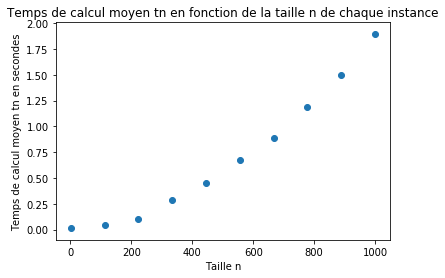

In [13]:
gr.mesure_temps_grapheAlea(0.5,1000,10)

Notre algorithme permettant de générer les graphes de manière aléatoire a une complexité de $\mathcal{O} (i \times N_{max}/10)$ avec $i$ $\in$ $\{ 1,...,10 \}$. Ainsi nous avons une complexité polynomiale, comme le montre bien la courbe.

## III. Méthodes approchées

L’algorithme de couplage crée une couverture en itérant sur les arêtes et ajoute les sommets qui ne sont pas encore dans la couverture.
Il faut noter qu'un couplage représente bien une couverture, pas forcément optimale. En effet, un couplage est un ensemble d’arêtes n’ayant pas d’extrémité en commun, donc toutes ses arêtes $e\in E$ l'ensemble des $m$ arêtes du graphe $G$ a au moins une de ses extrémités dans $V$ l'ensemble des $n$ sommets de $E$.


L’algorithme glouton cherche un sommet de degré maximum puis ajoute ce sommet à la couverture et l’enlève du graphe, ce qui supprime les arêtes incidentes. Ensuite l’algorithme itère tant qu’il reste des arêtes.

On rappelle que l’algorithme **algo-couplage** est 2-approché.

### 1. Démonstration de la non-optimalité de l'algorithme glouton.

Afin de montrer que l'algorithme glouton n'est pas optimal, nous avons construit un graphe permettant de le piéger. Pour cela, nous avons tout d'abord créé $k =$ 6 paires de noeuds reliés, ce qui nous fait pour l'instant 6 arêtes. Ensuite nous avons construit $k/2 =$ 3 autres sommets 
reliés chacun à 2 paires non communes précédemment construits. On continue de la même sorte avec la construction de $k/3$ = 2 autres sommets reliées à 3 paires, jusqu'à un dernier sommet relié à toutes les paires.  
De cette manière, nous construisons alors un graphe qui au fur et à mesure a son degré maximal qui augmente.  
Ainsi par construction, l'algorithme glouton va alors prendre dans le sens inverse de la construction les sommets.  
Dans l'image ci-dessous, l'algorithme glouton va alors retourner comme solution : `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]` alors que la solution optimale est `[14, 13, 12, 11, 10, 9]`.
L'algorithme glouton n'est bien pas optimal.
![Image ](antiGlouton.jpg)

Cet exemple nous montre par construction, un rapport d'approximation pour l'algorithme glouton de $H(k) \times OPT$ avec $H(k)$ étant une série harmonique de paramètre $k$. En effet, plus on augmente $k$, plus $r$ est grand.  
Ainsi l'algorithme glouton n'est pas $r$-approché pour un $r$ aussi grand que possible.

NB : Pour cet exemple, nous nous sommes documentés sur la thèse présentée par François Delbot : https://tel.archives-ouvertes.fr/tel-00927315/document

### 2. Comparaisons en fonction de $n$ et $p$ des algorithmes `algo_couplage` et `algo_glouton`.

Nous avons comparé en fonction de $n$ et de $p$ les algorithmes `algo_couplage` et `algo_glouton`. Pour cela nous avons tracé des courbes du temps de calcul $t_{n}$ de ces deux algos en fonction de la taille $n$ de 10 instances de graphes générées aléatoirement.

#### Temps de calcul :

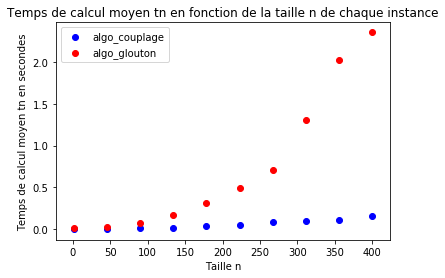

In [2]:
ma.mesure_temps_algoCouverture_n(400,0.5,10)

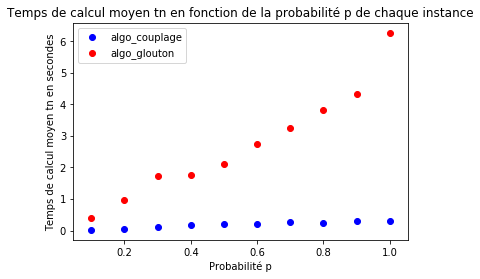

In [3]:
ma.mesure_temps_algoCouverture_p(400,10)

Grâce aux courbes obtenues ci-dessus, nous constatons que le temps de calcul moyen $t_{n}$ de l'`algo_couplage` est bien meilleur que celui de l'`algo_glouton`. En effet, cela s'explique par les complexités des algorithmes.  
La complexité de `algo_couplage` est en $\mathcal{O} (m)$ et celui de `algo_glouton` est en $\mathcal{O} (n)$ avec $m$ le nombre d'arêtes et $n$ le nombre de sommets sachant que $n > m$.  
Plus il y a d'arêtes, plus le temps de calcul de l'`algo_couplage` est meilleur que celui de l'`algo_glouton` puisqu'`algo_couplage` renvoie les sommets des arêtes d'un couplage du graphe.

#### Qualité des solutions retournées :

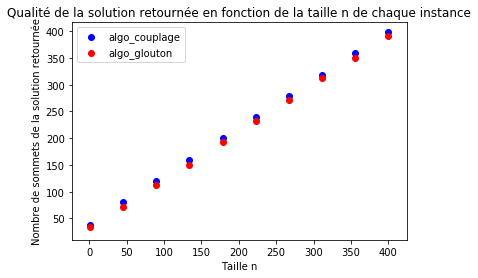

In [4]:
ma.mesure_qualite_algoCouverture_n(400,0.5,10)

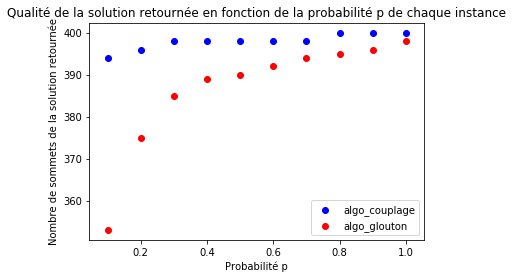

In [7]:
ma.mesure_qualite_algoCouverture_p(400,10)

En revanche, grâce aux courbes obtenues juste ci-dessus, nous constatons que la solution retournée par l'`algo_couplage` est moins bonne que celle renvoyée par l'`algo_glouton`.  
Néanmoins nous remarquons aussi que grâce à la courbe en fonction de la probabilité $p$, plus le nombre d'arêtes augmente, plus la solution d'`algo_couplage` est meilleure et plus les solutions retournées par ces deux algos sont proches. Ce qui semble logique puisque l'`algo_couplage` s'appuie sur les arêtes du graphe.  
Certes, l'`algo_glouton`  prend un sommet de degré maximum, mais dans un graphe complet l'efficacité des deux algos serait très proche.

## IV. Séparation et évaluation

### 1. Branchement

L’algorithme de branchement sélectionne une arête $e = \{u,v\}$ dans un graphe initial et crée un arbre binaire.
La première branche est le cas où $u$ est dans la couverture et est supprimé du graphe. La deuxième branche est symétrique pour $v$.
Ensuite l’algorithme itère de façon récursive avec le nouveau graphe.


#### Temps de calcul :

Nous avons évalué le temps de calcul de `branchement` en fonction de $n$ et de $p$ en tracant leur courbe respectif ci-dessous.

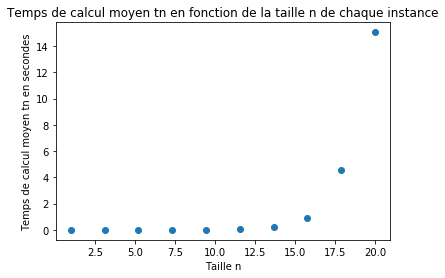

In [8]:
se.mesure_temps_branchement_n(20,0.5,10)

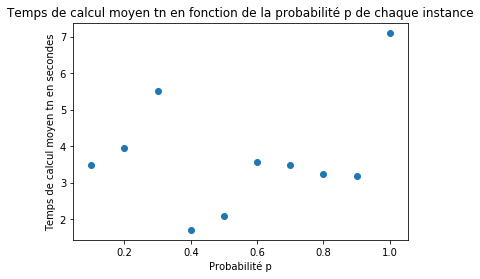

In [14]:
se.mesure_temps_branchement_p(20,10)

Nous constatons qu'en fonction de $n$, `branchement` a une complexité exponentielle, mais elle renvoie la meilleure solution dans tous les cas. Cela confirme bien que la méthode du `branchement` est un recherche exhaustive (ou algorithme de force brute).
En revanche en fonction de $p$, cela varie, avec un pic à une probabilité proche de 1 puisqu'il y a beaucoup plus de noeuds à visiter, reflétant le nombre conséquent d'arêtes.

#### Nombre de noeuds :

Nous avons aussi évalué le nombre de noeuds visités de `branchement` en fonction de $n$ et de $p$ en tracant leur courbe respectif ci-dessous.

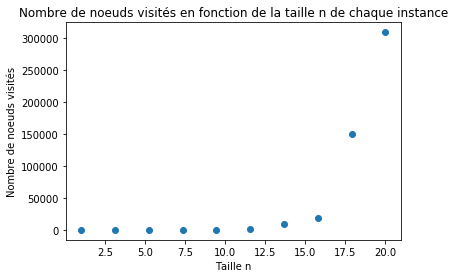

In [38]:
se.mesure_nbreNoeuds_branchement_n(20,0.5,10)

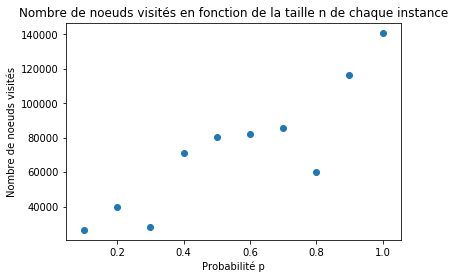

In [16]:
se.mesure_nbreNoeuds_branchement_p(20,10)

La courbe en fonction de $n$ reflète bien la complexité exponentielle. En effet, de manière plus générale, le nombre total de noeuds visités d'un arbre binaire est de $$\sum_{i=0}^n 2^i$$ avec $i$ le nombre d'arêtes du graphe dans notre cas. Ce qui explique bien alors la complexité exponentielle.  
La courbe en fonction de $p$ nous montre que plus il y a d'arêtes (plus $p$ est grand), plus le nombre de noeuds visités augmente, jusqu'à 140 000 noeuds visités pour un graphe complet de 20 sommets.  
Ainsi à partir de cette méthode basique du `branchement`, nous devons chercher un moyen de réduire le temps de calcul et le nombre de noeuds visités tout en assurant une solution optimale du problème.

### 2. Ajout de bornes

Nous allons donc chercher à ajouter des bornes afin d'élaguer des branches et améliorer la rapidité de l'algorithme et ainsi aussi parallèlement le nombre de noeuds visités.

#### Validité des bornes

Soit $G$ un graphe, $M$ un couplage de $G$ et $C$ une couverture de $G$. Alors
$$|C|\geq max\{b_{1},b_{2},b_{3}\}$$
avec $$b_{1}=\lceil \frac{m}{\triangle} \rceil$$ (où $\triangle$ est le degré maximum des sommets du graphe) $$b_{2}=|M|$$ $$b_{3}=\frac{2n-1-\sqrt{(2n-1)^{2}-8m}}{2}$$


##### Validité de la borne $b_{1}$ :
Le nombre d'arêtes $m$ est supérieur ou égal au degré maximum des sommets du graphe, puisqu'au meilleur des cas, il existerait un sommet avec toutes les arêtes du graphes branchées sur lui. Ainsi dans ce cas, $m = \triangle$. Dans le pire cas, $\triangle = 2 $ si le graphe est une chaîne élémentaire simple. Donc $m \geq \triangle$ et il est impossible que le degré maximal soit supérieur au nombre d'arêtes. Ainsi excluant le cas où on aurait un graphe sans arête, cela signifierait que $\frac{m}{\triangle} \geq 1$.  
De plus $\lceil \frac{m}{\triangle} \rceil \leq |E| \leq \frac{m}{2}$.  
Ainsi $|C|\geq b_{1}$.  
##### Validité de la borne $b_{2}$ : 
$|M|$ représente la cardinalité d'un couplage. Considérons un graphe à 2 sommets avec une seule arête les reliant entre eux. Dans ce cas, un couplage serait cette unique arête, alors que la couverture optimale serait seulement un de ses deux sommets. Donc dans ce cas $|C|=|M|$ puisque $b_{1}=1$ et $|M|=1$.  
Considérons un graphe plus conséquent (et donc composé de plusieurs sous-graphes du même type que celui que nous venons de décrire), sachant que les sommets du couplage représentent aussi une couverture (non optimale puisque qu'il renvoie au moins une arête et donc 2 sommets comme dans le cas précédent), cela signifierait donc que c'est la cardinalité du résultat de l'`algo_couplage` divisée par 2.  
Ainsi $|C|\geq|M|$.

#### Insertion des algorithmes glouton et de couplage dans le branchement

Nous avons comparé les temps de calcul de `branchement` sans borne et `branchement` soit avec comme borne supérieure la cardinalité de la solution retournée par l'`algo_couplage` soit avec celle de l'`algo_glouton`, en fonction de $n$ et en fonction de $p$.

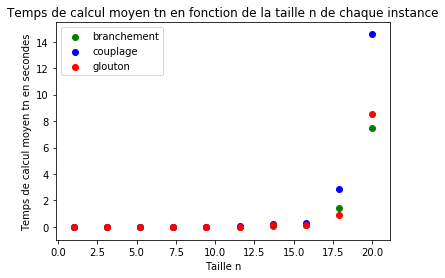

In [24]:
se.mesure_temps_bornes_n(20,0.5,10)

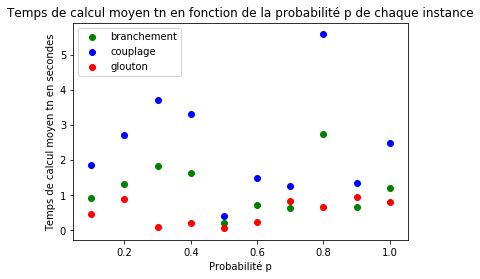

In [25]:
se.mesure_temps_bornes_p(20,10)

Nous constatons que le branchement avec couplage prend le plus de temps parmi les 3 algorithmes, et le branchement avec l'`algo_glouton` prend le moins de temps alors que ce dernier a un temps de calcul plus élevé que l'`algo_couplage`.  
Pour comprendre la raison de cette "incohérence", nous avons mesuré le nombre de noeuds visités par les 3 algorithmes.

Ensuite nous avons comparé la qualité des solutions de `branchement` sans borne et `branchement` soit avec comme borne supérieure la cardinalité de la solution retournée par l'`algo_couplage` soit avec celle de l'`algo_glouton`, en fonction de $n$ et en fonction de $p$.

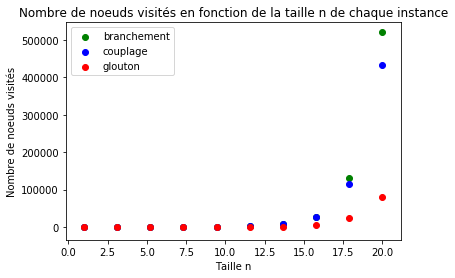

In [29]:
se.mesure_nbreNoeuds_bornes_n(20,0.5,10)

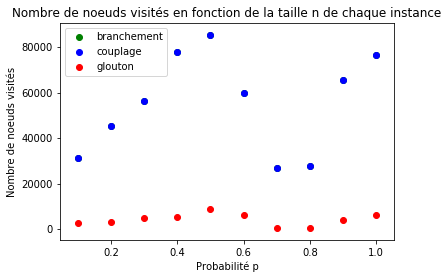

In [28]:
se.mesure_nbreNoeuds_bornes_p(20,10)

Tout d'abord, il faut noter que dans certains cas, `branchement` et `algo_couplage` renvoient la même solution (ou en tout cas la même cardinalité), ainsi leurs points peuvent se confondre sur nos graphiques.  
`branchement` et `algo_couplage` ont quasiment les mêmes résultats, et le branchement avec l'`algo_glouton` est bien meilleur en nombre de noeuds visités, de l'ordre de 4 à 8 fois moins de noeuds visités que `branchement` sans borne et branchement combiné à l'`algo_couplage`.  
Ce point précis est très important :
En effet, cela expliquerait pourquoi le branchement avec l'algorithme glouton a un temps de calcul bien inférieur aux deux autres algorithmes. L'`algo_glouton` prend certes plus de temps de calcul, mais il a l'avantage d'élaguer 4 à 8 fois plus de noeuds que l'`algo_couplage`, ainsi le temps de calcul élevé est compensé par le nombre de noeuds visités bien moindre.

#### Eﬃcacité des méthodes si l’on n’utilise que les bornes inférieures, ou que le calcul de solution réalisable (avec une borne inférieure triviale).


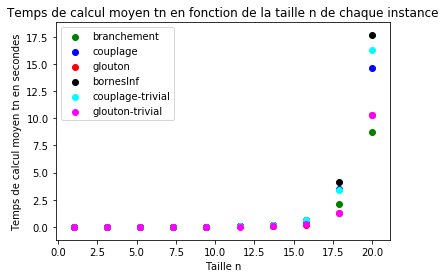

In [157]:
se.mesure_temps_bornes3_n(20,0.5,10)

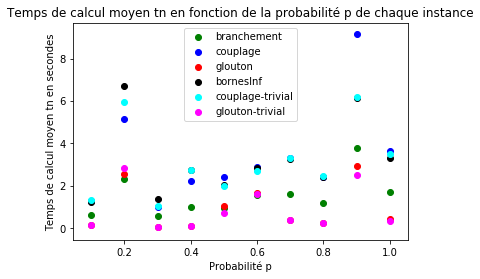

In [159]:
se.mesure_temps_bornes3_p(20,10)

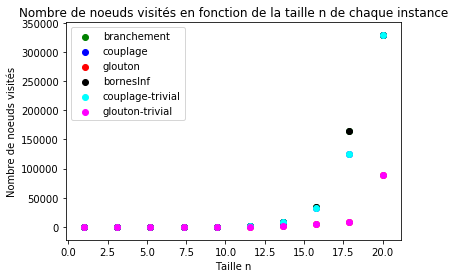

In [162]:
se.mesure_nbreNoeuds_bornes3_n(20,0.5,10)

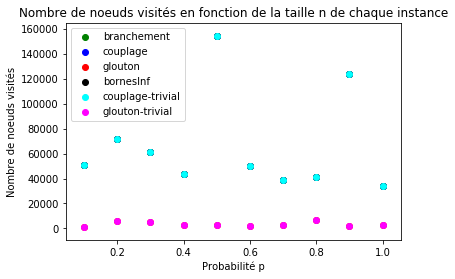

In [164]:
se.mesure_nbreNoeuds_bornes3_p(20,10)

Ces courbes sont les mêmes que celles précédentes mais en rajoutant les méthodes précédentes si l'on utilise que les bornes inférieures (bornesInf en légende sur les graphiques) ou que le calcul de solution réalisable (avec une borne inférieure triviale qui est $|M|$) (couplage-trivial et glouton-trivial dans la légende).  
Plusieurs points se confondent, mais notons surtout qu'enlever n'importe quelle borne réduit l'efficacité des algos. En revanche, pour glouton-trivial, les résultats renvoyés sont les mêmes que ceux du branchement normal avec l'algorithme glouton.

### 3. Amélioration du branchement

Les courbes ci-dessous sont légendées de la même manière que précédente.  

#### 1) Branchement amélioré

Nous avons repris le branchement avec comme borne inférieure la relation précédente, et comme borne supérieure la cardinalité de la solution retournée par l'algorithme glouton (glouton dans la légende des courbes).  
Une première amélioration de l’algorithme de branchement consiste à, lorsqu’on branche sur une arête $e = \{u,v\}$, ne pas prendre le sommet $u$ dans la deuxième branche et donc prendre tous les voisins de $u$ dans la couverture et les supprimer du graphe. (gloutonAmeliore dans la légende des courbes)

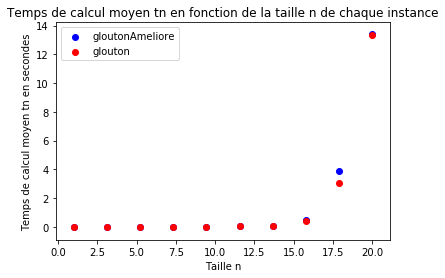

In [100]:
se.mesure_temps_bornesAmeliore_n(20,0.5,10)

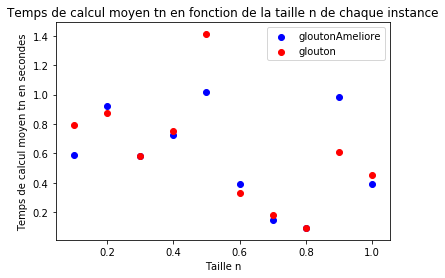

In [30]:
se.mesure_temps_bornesAmeliore_p(20,10)

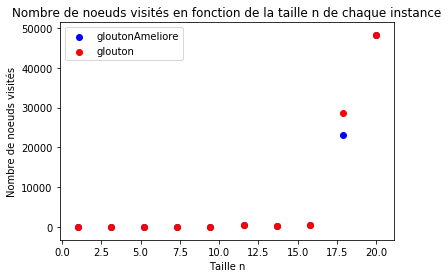

In [110]:
se.mesure_nbreNoeuds_bornesAmeliore_n(20,0.5,10)

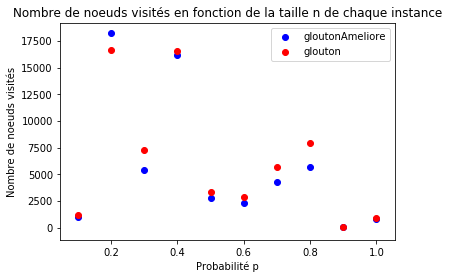

In [111]:
se.mesure_nbreNoeuds_bornesAmeliore_p(20,10)

Nous constatons que l'amélioration du branchement est minime. En effet le temps de calcul est peu inférieur et le nombre de noeuds visités est moindre avec l'amélioration. Cela s'explique par le fait qu'on élague davantage.

#### 2 et 3) Branchement amélioré plus

 Aﬁn d’éliminer un maximum de sommets dans la deuxième branche, il semble intéressant de choisir le branchement de manière à ce que le sommet $u$ soit de degré maximum dans le graphe restant.  
Les résultats de cette amélioration sont légendées ci-dessous par "branchement amélioré plus".

Dans un graphe $G$, si un sommet $u$ est de degré 1, il existe toujours une couverture optimale qui ne contient pas $u$.
En effet, considéront un graphe à deux sommets avec une arête les reliant. Dans ce cas, la couverture optimale serait un des deux sommets qui ont chacun un degré de 1, donc le sommet non pris ne serait pas dans la couverture choisie, et vice-versa.  
Prenons désormais un graphe plus conséquent, en réitérant le même raisonnement, nous pouvons donc avoir une couverture minimale n'ayant pas un sommet $u$ de degré 1.  
Ainsi, nous pouvons alors insérer ce test permettant de supprimer un sommet sans brancher dans notre algorithme (dans la légende : "branchement améliorer plus plus").

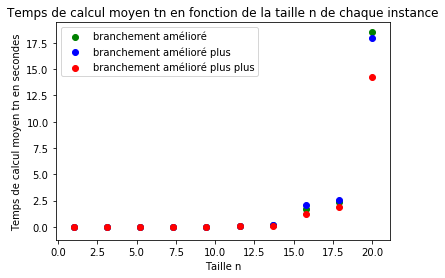

In [131]:
se.mesure_temps_ameliorationBranchement_n(20,0.5,10)

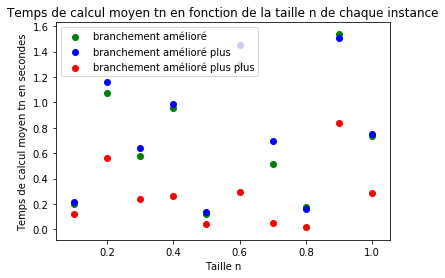

In [133]:
se.mesure_temps_ameliorationBranchement_p(20,10)

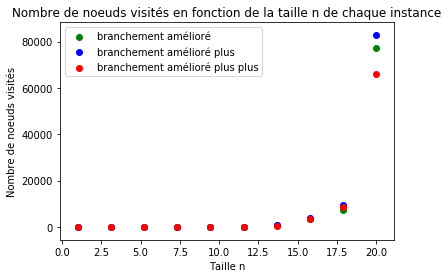

In [135]:
se.mesure_nbreNoeuds_ameliorationBranchement_n(20,0.5,10)

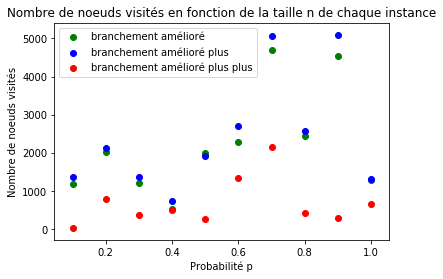

In [136]:
se.mesure_nbreNoeuds_ameliorationBranchement_p(20,10)

Nous nous appercevons alors que le branchement amélioré par l'élimination d'un maximum de sommets dans la deuxième branche (branchement amélioré plus) a une amélioration assez notable avec un temps de calcul et un nombre de noeuds visités moindre par rapport à la toute première amélioration.  
Néanmoins la toute dernière amélioration par la supression d'un sommet sans brancher est davantage meilleure. L'amélioration est drastique par rapport aux autres améliorations : le temps de calcul est divisé par 2 et le nombre de noeuds aussi. C'est vraisemblablement la meilleure amélioration, elle permet un taux d'élagage bien supérieur à celui des autres améliorations.

#### Récapitulatif et évolution de branchement :  
Nous sommes passés de 14 secondes de temps de calcul et 300 000 noeuds visités avec `branchement` simple à la même durée mais avec 65 000 noeuds visités seulement avec notre `branchement` amélioré  lorsque c'est en fonction de $n$. Le nombre de noeuds visités a diminué de presque 5 fois par rapport au branchement simple dans ce cas.
Mais en fonction de $p$, nous sommes passés de 7 secondes de temps de calcul et 140 000 noeuds visités avec `branchement` simple à seulement 0,3 seconde de temps de calcul et moins de 1000 noeuds visités. Le temps de calcul a diminué d'un facteur de plus de 20 et le nombre de noeuds d'un facteur de 140.  
Ainsi les améliorations ont bien fonctionné.

### 4. Qualité des algorithmes approchés

#### Evaluer expérimentalement (en fonction de n) le rapport d’approximation des algorithmes de couplage et glouton. 

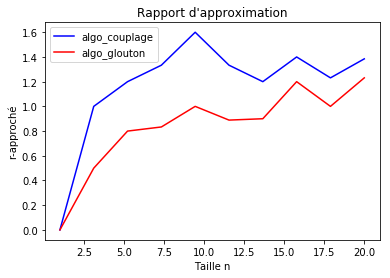

In [143]:
se.rapportApproximation(0.5,20,10)

D'après les courbes obtenues, nous constatons bien qu'expérimentalement, le rapport d'approximation de `algo-couplage` est inférieur à 2, donc cela confirme qu'il est de 2 pour `algo_couplage`.  
Pour `algo_glouton` le rapport est inférieur à celui d'`algo_couplage` puisqu'il renvoie de meilleures solutions.

#### Autre(s) heuristique(s) :

Grâce au dernier cours, nous avons pensé à modifier notre dernier algorithme le plus efficace en type *Las Vegas*.  
De base, tous nos algorithmes du projet sélectionnent comme arête le premier de la liste renvoyée par la fonction de la bibliothèque. Désormais avec la modification, l'algorithme va prendre de manière totalement aléatoire cet arête.

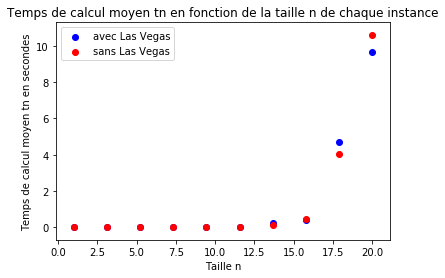

In [34]:
se.mesure_temps_lasVegas_n(20,0.5,10)

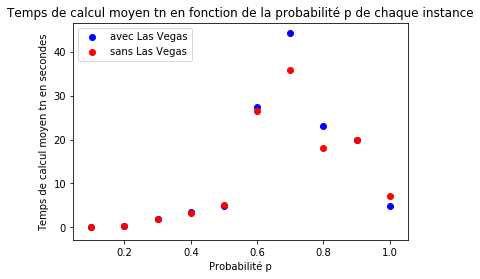

In [38]:
se.mesure_temps_lasVegas_p(20,10)

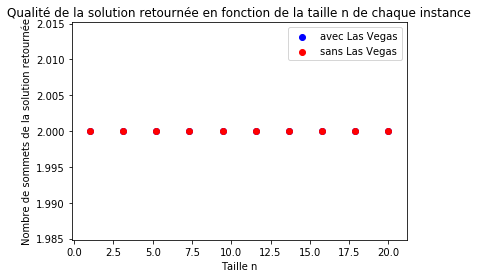

In [37]:
se.mesure_qualite_lasVegas_n(20,0.5,10)

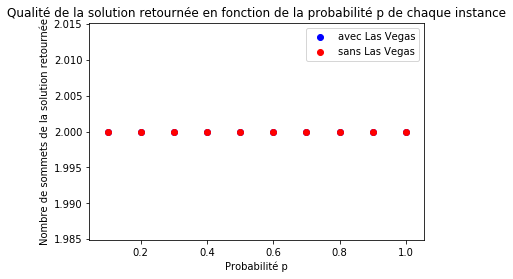

In [39]:
se.mesure_qualite_lasVegas_p(20,10)

Nous constatons alors que les résultats sont assez similaires avec ou sans le type *Las Vegas*, mais notons que puisque l'algorithme de *Las Vegas* est aléatoire, alors les courbes peuvent aussi varier, bien que les résultats restent en général moyennement proches.

## V. Conclusion

Tout d'abord, nous avons étudié les algorithmes `algo_couplage` et `algo_glouton`, néanmoins ce ne sont que des méthodes approchées : elles n'envoient pas toujours la solution optimale.  
Nous nous sommes alors intéressés aux méthodes exactes avec tout d'abord, la méthode du branchement simple.  
Nous nous sommes aperçus que certes, la réponse optimale est renvoyée, mais le temps de calcul est beaucoup trop élevé, surtout sur des graphes très conséquents, dû à la complexité exponentielle qui explose. Nous devions alors modifer ce branchement tout en assurant une solution optimale. Nous devons donc élaguer le maximum de branches.  
Pour cela, nous avons mis en place des bornes basées sur des relations mathématiques, mais aussi sur les solutions renvoyées par les algorithmes des méthodes approchées, particulièrement celle de l'algorithme glouton qui renvoie la meilleure solution. Grâce à cette dernière, notre branchement amélioré combiné avec d'autres améliorations ont permis de résoudre le problème du *Vertex Cover* de manière optimale tout en ayant un temps de calcul acceptable.  
Les méthodes approchées ont donc l'objectif, comme l'indique leur nom, de nous approcher des résultats optimaux, et d'affiner la précision des décisions de branchement et de séparation dans le parcours de l'arbre de recherche.  
Ainsi ce projet nous a permis de comprendre comment combiner des méthodes approchées à des méthodes exactes afin d'obtenir une solution optimale dans un temps de calcul respectable.